<a href="https://colab.research.google.com/github/SAISRIJA-68/OIBSIP/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of dataset: (541909, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Sample of RFM Table:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1

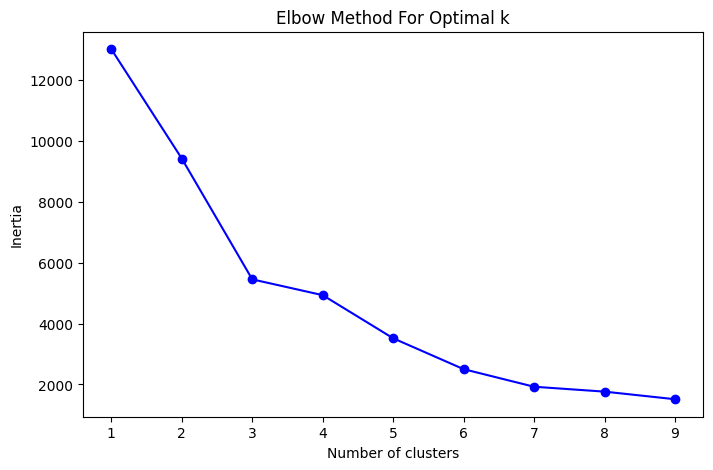

Silhouette Score: 0.359


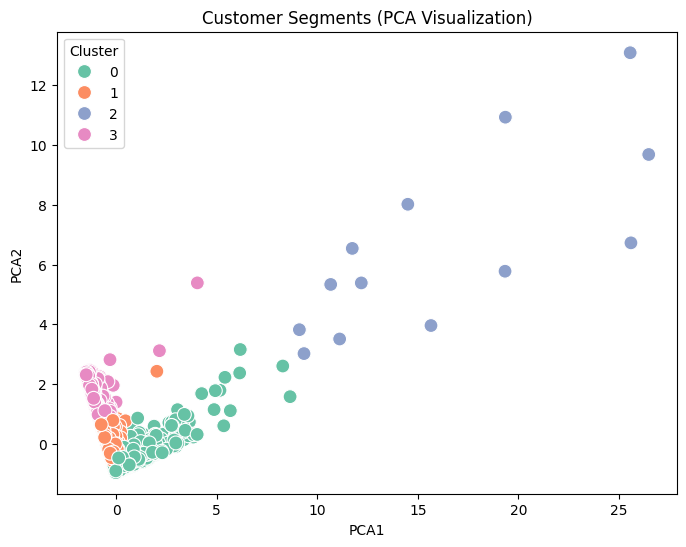


Cluster Summary:
         Recency  Frequency   Monetary   PCA1  PCA2
Cluster                                            
0          20.99     135.29    2645.82   0.46 -0.58
1          98.22      37.72     773.88  -0.27 -0.05
2           4.69    2565.31  126118.31  16.20  6.60
3         272.41      25.14     605.84  -1.03  1.50

--- Insights ---

Cluster 0:
→ Recently active customers. Maintain engagement through personalized marketing.

Cluster 1:
→ Recently active customers. Maintain engagement through personalized marketing.

Cluster 2:
→ High-value loyal customers. Offer loyalty rewards and exclusive discounts.

Cluster 3:
→ Infrequent shoppers. Send promotional offers to encourage repeat purchases.

✅ Customer Segmentation Analysis Completed Successfully!


In [1]:
# -----------------------------
# CUSTOMER SEGMENTATION ANALYSIS PROJECT
# -----------------------------

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 2: Load dataset
# You can upload your dataset or use a sample dataset from an online source
# For demo, we’ll use the Online Retail dataset (UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# Step 3: Explore the dataset
print("Shape of dataset:", data.shape)
print("\nData Info:")
print(data.info())
data.head()

# Step 4: Data Cleaning
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Remove negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

# Create a new column for Total Spend
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Step 5: Create RFM (Recency, Frequency, Monetary) features
import datetime as dt

# Define a reference date (last invoice date + 1 day)
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',                                      # Frequency
    'TotalPrice': 'sum'                                        # Monetary
})

rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)

print("\nSample of RFM Table:")
print(rfm.head())

# Step 6: Data Standardization
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Step 7: Determine Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Step 8: Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Step 9: Evaluate with Silhouette Score
score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {score:.3f}")

# Step 10: Visualize Clusters (using PCA for 2D visualization)
pca = PCA(2)
rfm_pca = pca.fit_transform(rfm_scaled)
rfm['PCA1'] = rfm_pca[:, 0]
rfm['PCA2'] = rfm_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments (PCA Visualization)')
plt.show()

# Step 11: Analyze Each Cluster
cluster_summary = rfm.groupby('Cluster').mean().round(2)
print("\nCluster Summary:")
print(cluster_summary)

# Step 12: Insights and Recommendations
print("\n--- Insights ---")
for i, row in cluster_summary.iterrows():
    print(f"\nCluster {i}:")
    if row['Monetary'] > cluster_summary['Monetary'].mean() and row['Frequency'] > cluster_summary['Frequency'].mean():
        print("→ High-value loyal customers. Offer loyalty rewards and exclusive discounts.")
    elif row['Recency'] < cluster_summary['Recency'].mean():
        print("→ Recently active customers. Maintain engagement through personalized marketing.")
    elif row['Frequency'] < cluster_summary['Frequency'].mean():
        print("→ Infrequent shoppers. Send promotional offers to encourage repeat purchases.")
    else:
        print("→ Dormant or low-value customers. Consider reactivation campaigns.")

print("\n✅ Customer Segmentation Analysis Completed Successfully!")
